# 데이터 시각화 I 실습

막대그래프, 선그래프, 히스토그램, 파이차트, 산점도, 박스플롯을 구현해봅니다.

실습에 사용하는 데이터는 https://www.kaggle.com/datasets/nikhil7280/weather-type-classification 데이터입니다.

본인이 원하는 다른 데이터가 있다면 다른 데이터를 사용하셔도 좋습니다.

데이터에서 적절한 데이터를 선정하여 각 시각화 분석에 적용합니다.

시각화를 진행할 때는 차트 뿐만 아니라 범례, 제목, 레이블, 색상, 크기 등 여러가지 요소들을 직접 개발하시면서

데이터의 특성을 잘 이해해보시면 좋을 것 같습니다.

In [2]:
# 기본 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
# 데이터 불러오기
weather_data = pd.read_csv('weather_classification_data.csv')

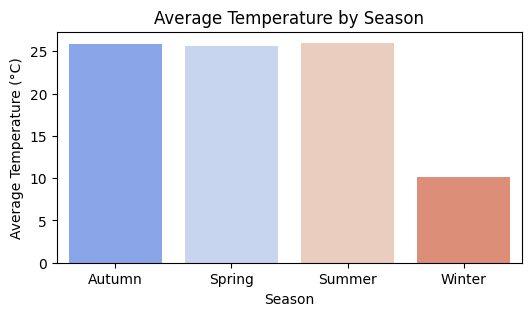

In [8]:
# 1. 막대그래프: 계절별 평균 기온
season_avg_temp = weather_data.groupby('Season')['Temperature'].mean().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x='Season', y='Temperature', data=season_avg_temp, hue='Season', dodge=False, palette='coolwarm', legend=False)
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°C)')
plt.show()

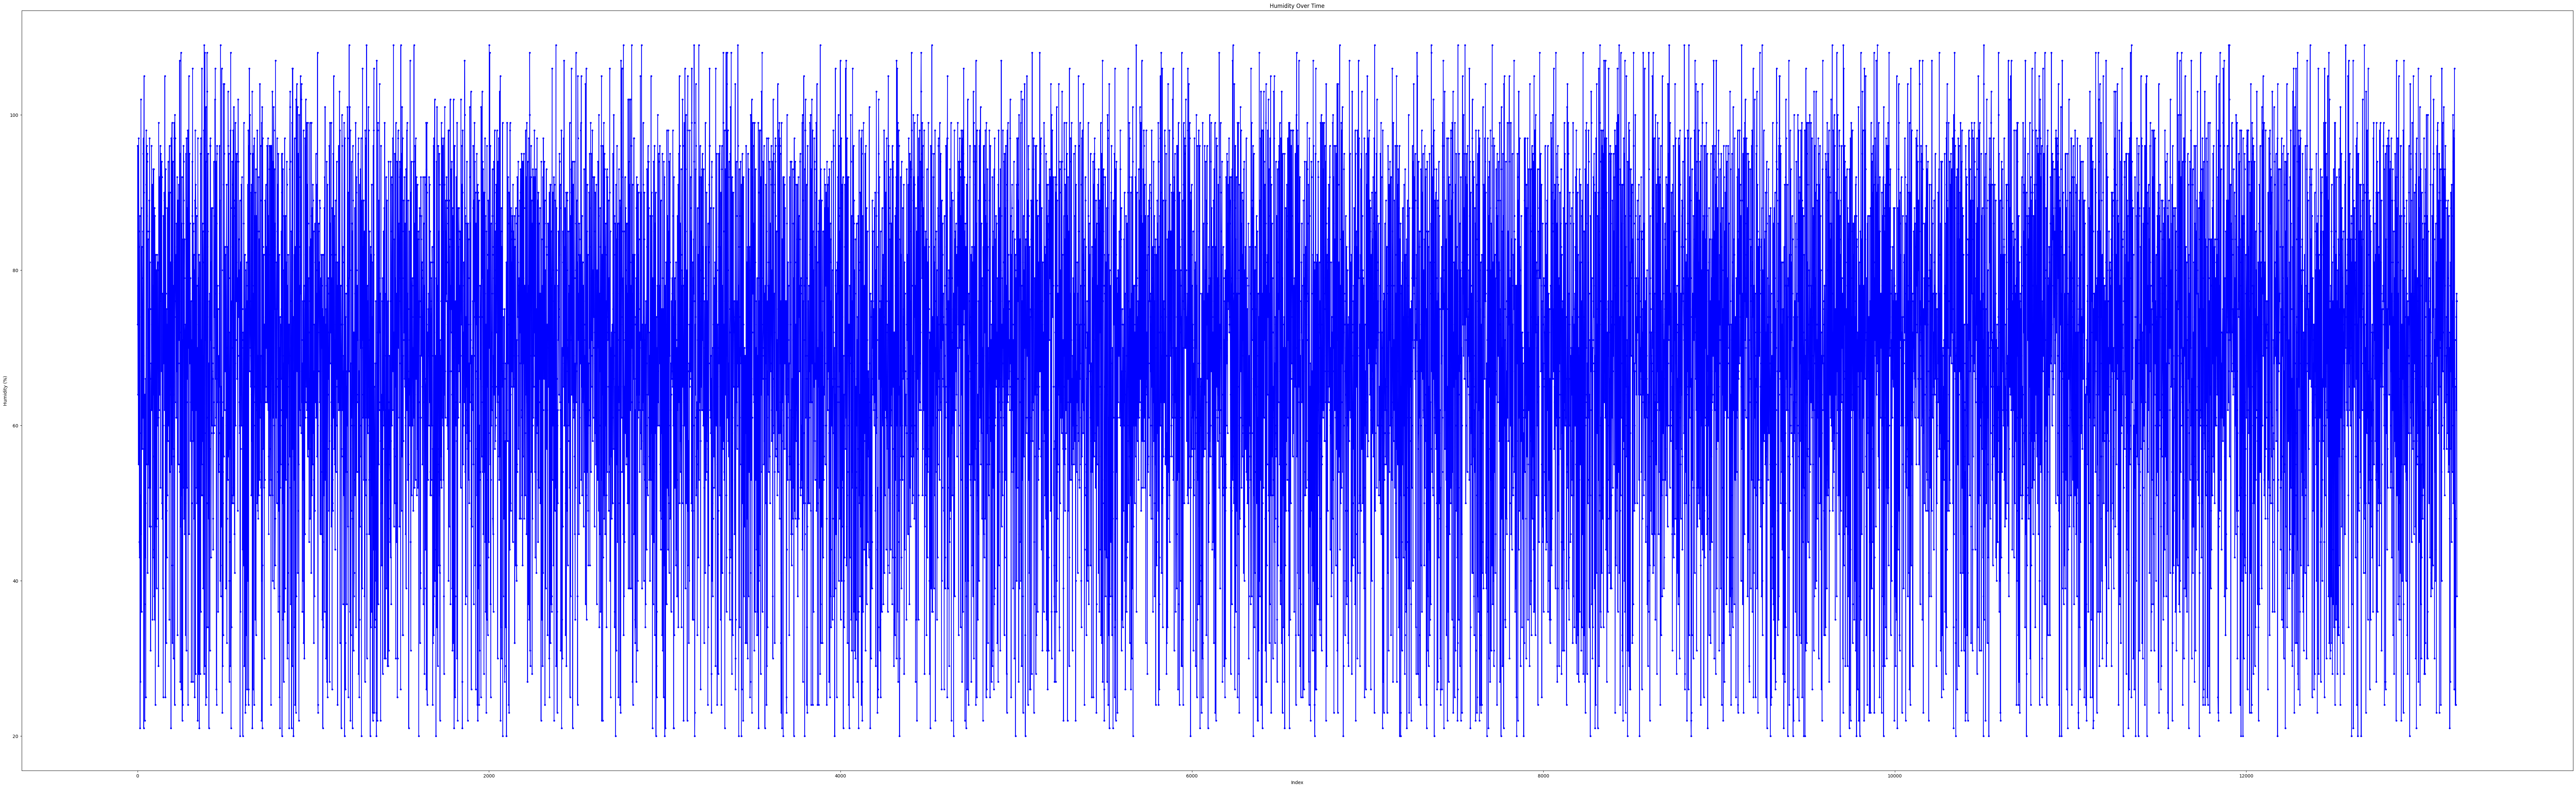

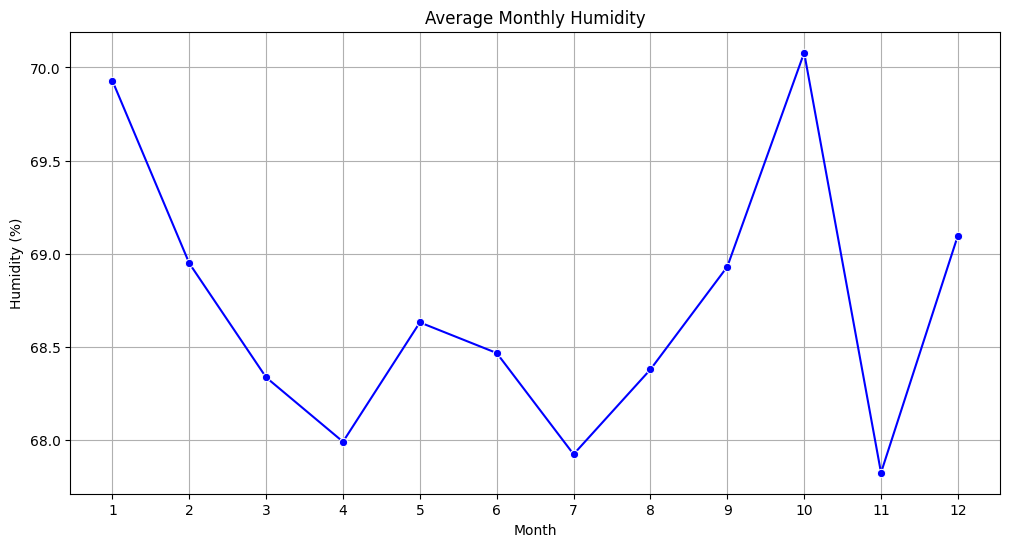

In [22]:
# 2. 선그래프: 데이터 순서대로 습도 변화
plt.figure(figsize=(100, 30))
plt.plot(weather_data.index, weather_data['Humidity'], color='blue', linestyle='-', marker='o', markersize=3)
plt.title('Humidity Over Time')
plt.xlabel('Index')
plt.ylabel('Humidity (%)')
plt.show()

# 데이터에 'Month' 컬럼이 없기 때문에 임의로 월을 추가합니다.
# 여기서는 데이터를 1월부터 시작했다고 가정하고 'Month' 컬럼을 추가합니다.
weather_data['Month'] = (weather_data.index % 12) + 1

monthly_avg_humidity = weather_data.groupby('Month')['Humidity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Humidity', data=monthly_avg_humidity, marker='o', color='blue')
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

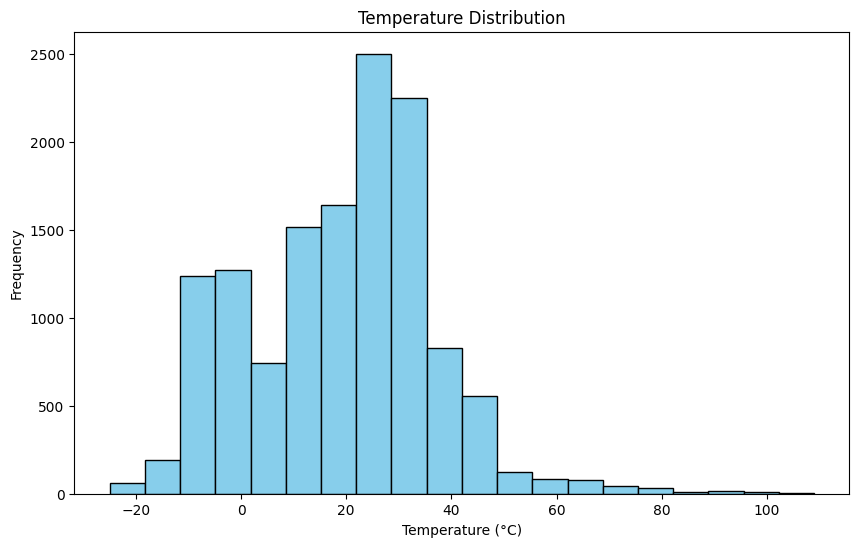

In [14]:
# 3. 히스토그램: 기온 분포
plt.figure(figsize=(10, 6))
plt.hist(weather_data['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

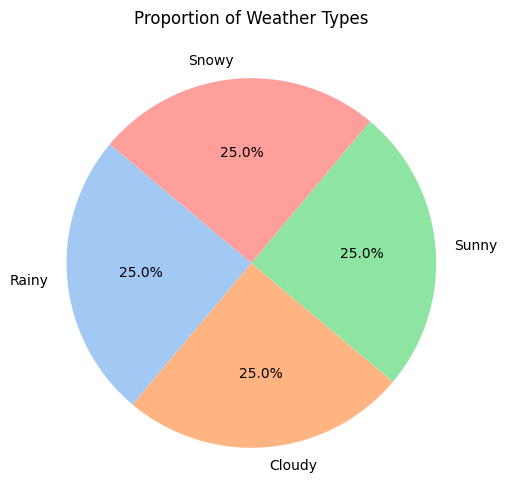

In [15]:
# 4. 파이차트: 날씨 유형 비율
weather_type_counts = weather_data['Weather Type'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(weather_type_counts, labels=weather_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Weather Types')
plt.show()

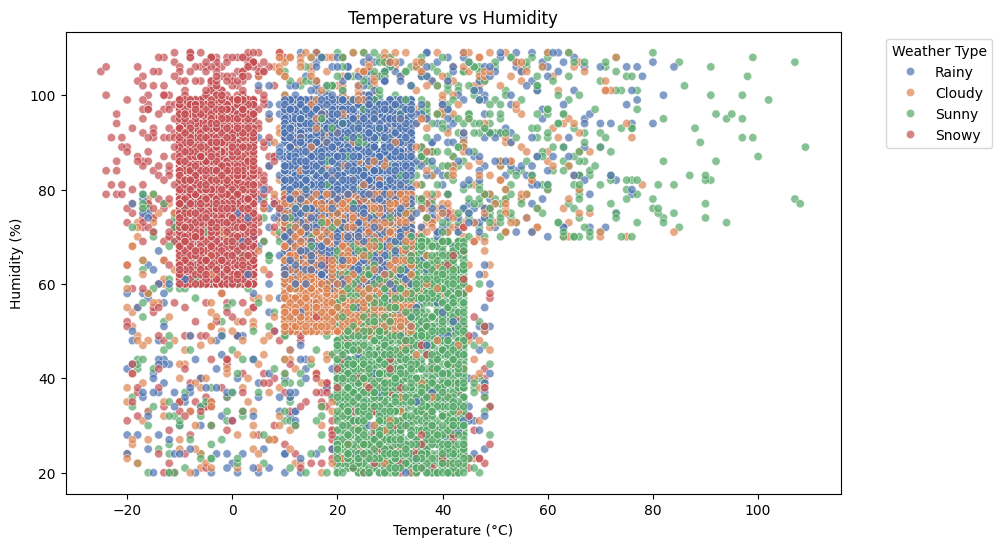

In [16]:
# 5. 산점도: 기온과 습도의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data, hue='Weather Type', palette='deep', alpha=0.7)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

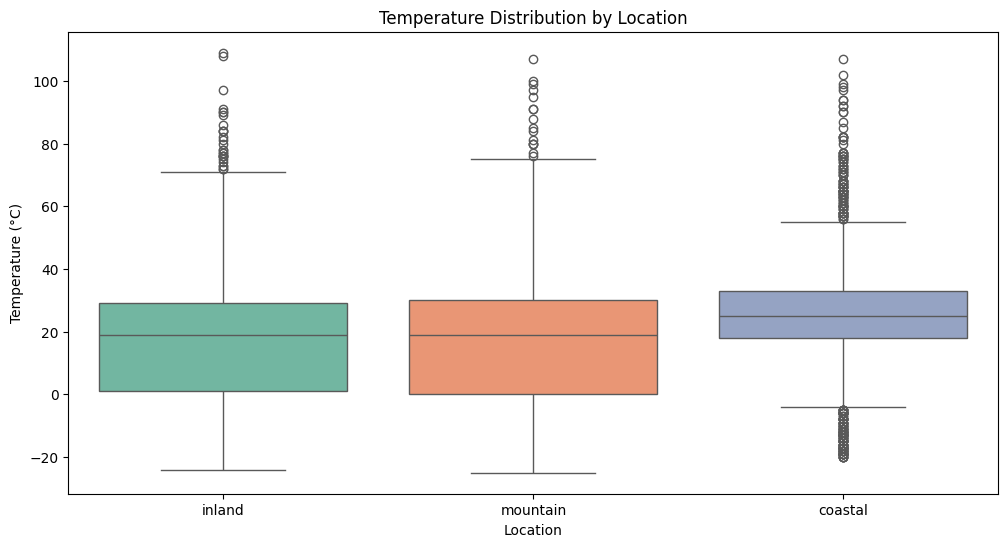

In [19]:
# 6. 박스플롯: 위치별 기온 분포
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Temperature', hue='Location', data=weather_data, palette='Set2', dodge=False, legend=False)
plt.title('Temperature Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')
plt.show()

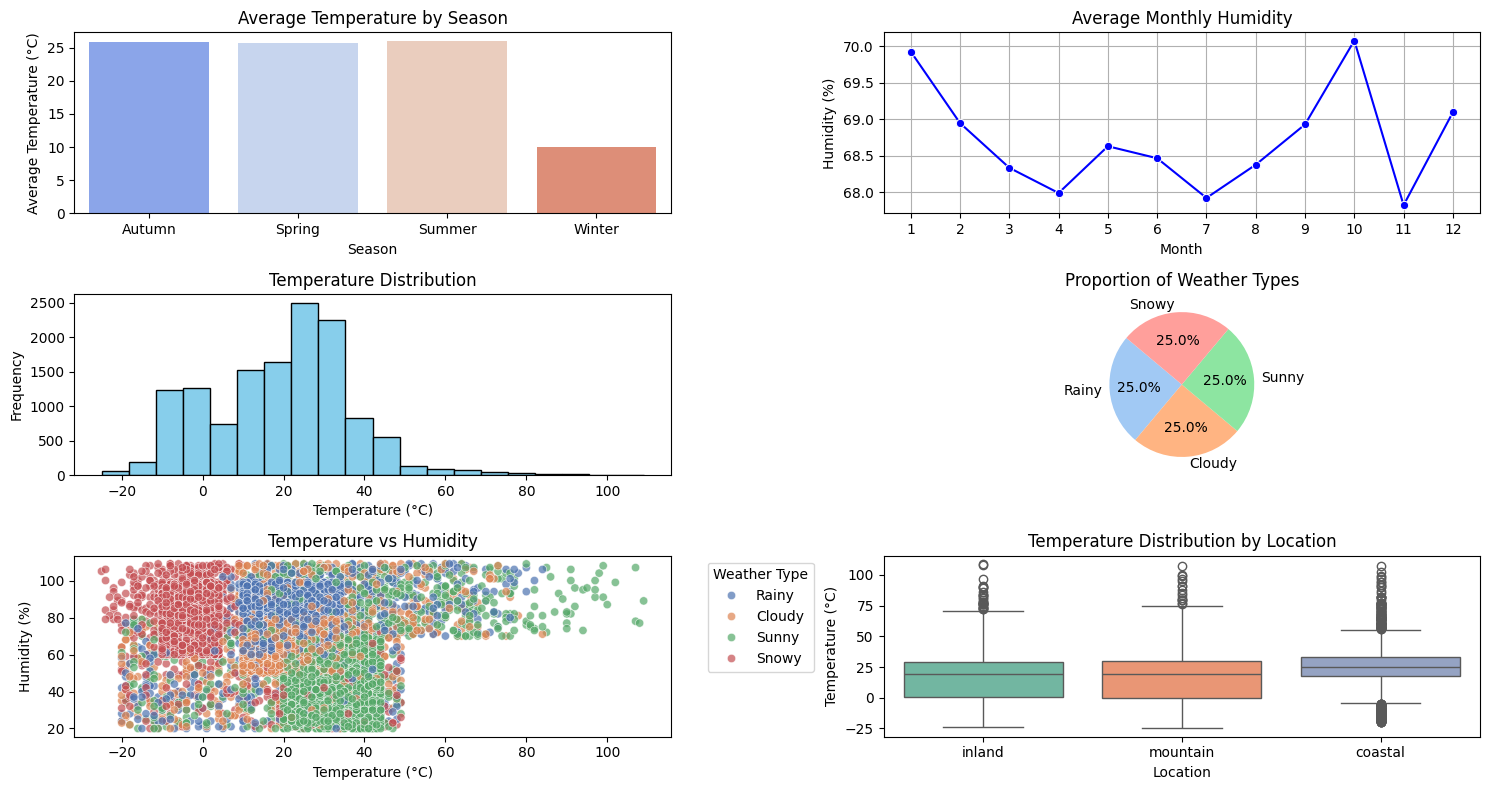

/var/folders/5w/ptnqk03j72x_7v4gsrv2_g9w0000gn/T/ipykernel_66969/2700806548.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Temperature', data=weather_data, palette='Set2', ax=ax2)


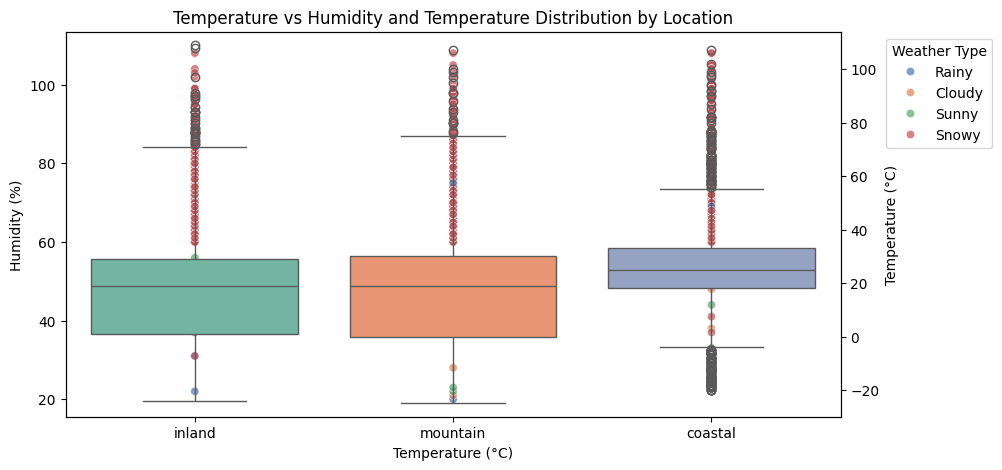

In [28]:
# 7. 여러 시각화 차트 합쳐보기
weather_data['Month'] = (weather_data.index % 12) + 1

# 1. 막대그래프: 계절별 평균 기온
season_avg_temp = weather_data.groupby('Season')['Temperature'].mean().reset_index()

# 2. 선그래프: 월별 평균 습도
monthly_avg_humidity = weather_data.groupby('Month')['Humidity'].mean().reset_index()

# 4. 파이차트: 날씨 유형 비율
weather_type_counts = weather_data['Weather Type'].value_counts()

# 여러 시각화 차트 합치기
plt.figure(figsize=(15, 8))

# 막대그래프
plt.subplot(3, 2, 1)
sns.barplot(x='Season', y='Temperature', hue='Season', dodge=False, data=season_avg_temp, palette='coolwarm', legend=False)
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°C)')

# 선그래프
plt.subplot(3, 2, 2)
sns.lineplot(x='Month', y='Humidity', data=monthly_avg_humidity, marker='o', color='blue')
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.xticks(range(1, 13))
plt.grid(True)

# 히스토그램
plt.subplot(3, 2, 3)
plt.hist(weather_data['Temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# 파이차트
plt.subplot(3, 2, 4)
plt.pie(weather_type_counts, labels=weather_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Weather Types')

# 산점도
plt.subplot(3, 2, 5)
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data, hue='Weather Type', palette='deep', alpha=0.7)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 박스플롯
plt.subplot(3, 2, 6)
sns.boxplot(x='Location', y='Temperature', hue='Location', data=weather_data, palette='Set2', dodge=False, legend=False)
plt.title('Temperature Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()




# 산점도와 박스플롯 결합하기
# 기온과 습도의 관계를 보여주는 산점도와 위치별 기온 분포
# 여러 시각화 차트 합치기 (산점도 + 박스플롯)
fig, ax1 = plt.subplots(figsize=(10, 5))

# 산점도
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data, hue='Weather Type', palette='deep', alpha=0.7, ax=ax1)
ax1.set_title('Temperature vs Humidity and Temperature Distribution by Location')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Humidity (%)')
ax1.legend(title='Weather Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 보조 축 생성
ax2 = ax1.twinx()

# 박스플롯
sns.boxplot(x='Location', y='Temperature', data=weather_data, palette='Set2', ax=ax2)
ax2.set_ylabel('Temperature (°C)')
ax2.set_ylim(weather_data['Temperature'].min() - 5, weather_data['Temperature'].max() + 5)  # 기온 범위 설정

plt.show()